In [1]:
import pandas as pd

dataset = pd.read_csv('./data/TriptiRecall.csv')

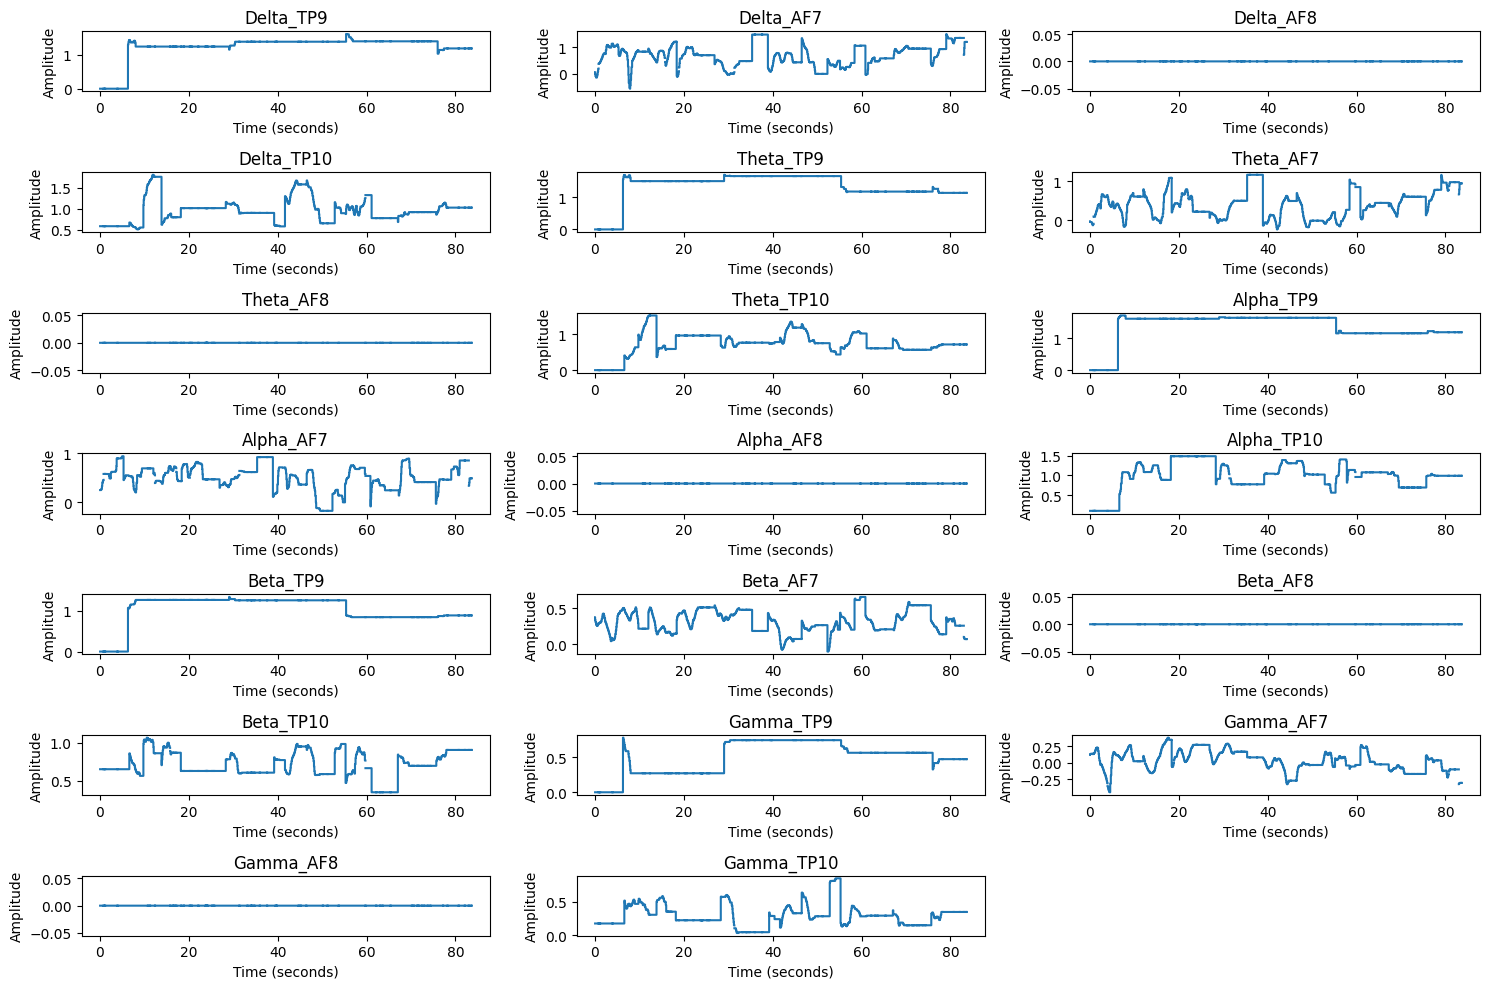

In [4]:
import matplotlib.pyplot as plt

dataset['TimeStamp'] = pd.to_datetime(dataset['TimeStamp'], format='%Y-%m-%d %H:%M:%S.%f')

time_diff = (dataset['TimeStamp'] - dataset['TimeStamp'].iloc[0]).dt.total_seconds()

plt.figure(figsize=(15, 10))

for i, column in enumerate(dataset.columns[1:21]):
    plt.subplot(7, 3, i + 1)
    plt.plot(time_diff, dataset[column])
    plt.title(column)
    plt.xlabel('Time (seconds)')
    plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()

In [34]:
import os
import pandas as pd
from scipy.integrate import simps

column_titles = [f"{dataset.columns[i]}" for i in range(1, 21)]
column_titles.append('Label')
result_df = pd.DataFrame(columns=column_titles)

for filename in os.listdir('./data/'):
    if filename.endswith(".csv"):
        dataset = pd.read_csv('/Users/ericomielan/Downloads/465Data/' + filename)
        
        dataset['TimeStamp'] = pd.to_datetime(dataset['TimeStamp'], format='%Y-%m-%d %H:%M:%S.%f')

        time_diff = (dataset['TimeStamp'] - dataset['TimeStamp'].iloc[0]).dt.total_seconds()

        auc_values = []

        for column_name in dataset.columns[1:21]:
            selected_column = dataset[column_name][1:]

            selected_column_numeric = pd.to_numeric(selected_column, errors='coerce').dropna()

            sorted_data = selected_column_numeric.sort_values()

            auc = simps(sorted_data.values)
            auc_values.append(auc)

        row_data = {f"{dataset.columns[i+1]}": auc_values[i] for i in range(20)}
        row_data['Label'] = 1 if 'maze' in filename.lower() else 0

        result_df = result_df.append(row_data, ignore_index=True)

result_df.to_csv('area_under_curve.csv', index=False)

/var/folders/0n/3jh9862d73j9wkdg1y54jxf80000gn/T/ipykernel_61156/2722896056.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(row_data, ignore_index=True)
/var/folders/0n/3jh9862d73j9wkdg1y54jxf80000gn/T/ipykernel_61156/2722896056.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(row_data, ignore_index=True)
/var/folders/0n/3jh9862d73j9wkdg1y54jxf80000gn/T/ipykernel_61156/2722896056.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  result_df = result_df.append(row_data, ignore_index=True)
/var/folders/0n/3jh9862d73j9wkdg1y54jxf80000gn/T/ipykernel_61156/2722896056.py:45: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a